<a href="https://colab.research.google.com/github/elio-li/CSCI4964/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In your project, you will pick a dataset (not the same as in the previous homeworks) and describe the problem you would like to solve. Include a link to the dataset source. Next, you should pick a Deep Learning Framework that you would like to use to implement your 2-layer Neural Network.

## Task 1 (25 points)

Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.)

For example, some of the known resources for TensorFlow are:
- https://www.tensorflow.org/guide/autodiff
- https://www.tensorflow.org/api_docs/python/tf/GradientTape

Hint: You need to figure out the APIs/packages used to implement forward propagation and backward propagation.

## Task 2 (60 points)

Once you have figured the resources you need for the project, design, and implement your project. The project must include the following steps (it’s not limited to these steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement mini-batch gradient descent to train your model. In this step it is up to you
as someone in charge of their project to improvise using optimization algorithms
(Adams, RMSProp etc.) and/or regularization.
6. Present the results using the test set.

In [38]:
# Dataset Link: https://archive-beta.ics.uci.edu/ml/datasets/spambase

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

# Read File, Get x & y
df = pd.read_csv("spambase.csv")
y = df['label']
x = df.drop(['label'], axis = 1)

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

x = preprocessor.fit_transform(x)

In [39]:
# 2. Perform a train-dev-test split.
x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size=0.8)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_valid:\t{}'.format(x_valid.shape))
print('y_valid:\t{}'.format(y_valid.shape))

x_train:	(3680, 57)
y_train:	(3680,)
x_valid:	(460, 57)
y_valid:	(460,)


Epoch 1/100
74/74 [==============================] - 1s 4ms/step - loss: 0.4933 - val_loss: 0.2210
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1932 - val_loss: 0.1480
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1317 - val_loss: 0.1273
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1070 - val_loss: 0.1127
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.1048
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0827 - val_loss: 0.0987
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0757 - val_loss: 0.0930
Epoch 8/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0706 - val_loss: 0.0917
Epoch 9/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0669 - val_loss: 0.0863
Epoch 10/100
74/74 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 0.0831
Epoch 11/

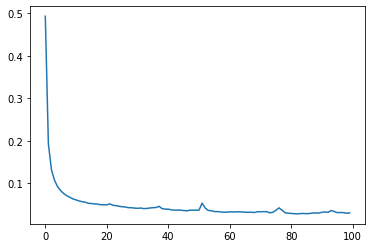

In [72]:
# 3. Activation Funtion is 'RELU',
#    For the 2-Layers NN, the hidden layer contains 70 neurons, where the output layer contains 1 neurons.
#    Adam is used as the optimization algorithm and use mean square error as the regression loss.

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(units=50, activation='relu', input_shape=[57]),   
  layers.Dense(units=1),
])

model.compile(
  optimizer='adam',
  loss='mean_squared_error'
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=50,
    epochs=100
)

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [73]:
# 4. Evaluate with the test set
model.evaluate(x=x_test, y=y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.0601


0.06014584004878998

## Task 3 (15 points)

In task 2 describe how you selected the hyperparameters. What was the rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use an optimization algorithm? Why or why not?

Lets first see some results by manipulating the hyperparameters and optimization algorithms:

| loss   | val_loss | neurons | activation | optimizer | batch_size | 
| ------ | -------- | ------- | ---------- | --------- | ---------- |
| 0.0345 | 0.0628   | 70      | relu       | adam      | 100        |
| 0.0451 | 0.0888   | 30      | relu       | adam      | 100        |
| 0.0291 | 0.0616   | 110     | relu       | adam      | 100        |
| 0.0308 | 0.0607   | 200     | relu       | adam      | 100        |

We can see that less number of neurons leads to higher losses and validation losses, and greater number of neurons leads to lower loss. But we see no significant jump from 110 neurons to 200 neurons, also the cost function it generated tends to be unstable(lots of spikes on it). I believe this is caused by overfitting. Thus the best number of neurons should be around 100.

Now we will change the activation function to see the changes:

| loss   | val_loss | neurons | activation | optimizer | batch_size | 
| ------ | -------- | ------- | ---------- | --------- | ---------- |
| 0.0314 | 0.0631   | 100     | relu       | adam      | 100        |
| 0.0547 | 0.0573   | 100     | sigmoid    | adam      | 100        |
| 0.0376 | 0.0635   | 100     | tanh       | adam      | 100        |
| 0.0363 | 0.0456   | 100     | softmax    | adam      | 100        |

Overall, softmax activation function have both least losses, and sigmoid function have higher loss, but it's the best generalized, relu and tanh doesn't have too much differences, the difference between their loss and validation loss is the largest.


Next we will change the optimizer to see what make it difference:

| loss   | val_loss | neurons | activation | optimizer | batch_size | 
| ------ | -------- | ------- | ---------- | --------- | ---------- |
| 0.0380 | 0.0455   | 100     | softmax    |           | 100        |
| 0.0363 | 0.0456   | 100     | softmax    | adam      | 100        |
| 0.0383 | 0.0456   | 100     | softmax    | RMSprop   | 100        |
| 0.2222 | 0.2219   | 100     | softmax    | SGD       | 100        |
| 0.3245 | 0.3234   | 100     | softmax    | Adagrad   | 100        |

I'm a little confused by this, in the first row I did not use any optimizers but the result looks very similar to adam and RMSprop, while both SGD & Adagrad even make the result worse. In my opinion there are 2 possible explanations of this since optimizers shouldn't make my result worse, one explanation is something wrong with the dataset it self, another way explaning is that the model trained is already overfitting before applying any optimizers.

| loss   | val_loss | neurons | activation | optimizer | batch_size | 
| ------ | -------- | ------- | ---------- | --------- | ---------- |
| 0.3245 | 0.3234   | 100     | softmax    | Adagrad   | 100        |
| 0.1648 | 0.1749   | 50      | relu       | Adagrad   | 100        |
| 0.1375 | 0.1443   | 50      | relu       | Adagrad   | 50         |
| 0.1042 | 0.1102   | 70      | relu       | Adagrad   | 50         |

After numbers of changing the parameters, I've successfully tuning the losses down to roughly 0.1, although this is still very far from my previous best result, this is still a big improvement for Adagrad optimizer.

In general, I started the model training by using all the default parameters, and then I gradually adding, or changing the parameters one by one, and once I get some better result I will begin to play around all those parameters, finding the best set of values that can output the lowest losses.